## Type of gradient descent

Learning Rate  - необходимо выбрать правильно. Если мы выберем большой lr, то мы уйдем далеко. 

Стохастичсеский градиентдный спуск - давай брать $n$ объетов из выборки случайно (псевдослучайно), чтобы на них посчитать Loss -> оценка ошибки, оценка градиентов, оценка параметров.

Нам хочется искать градиенты более удобным способом.

Мы хотим найти минимальную точку. Если мы говорим про градиентный спуск, то у нас есть только сила, тянущая мячик (ускорение) и нет инерции, по аналогии с миром.

## 1. First idea: moment(impulse)

Если мы запускаем градиент, то у нас у градиента есть инерция и, если даже мы попали в локальный минимум, то по инерции он будет двигаться дальше, есть надежда что дойдем до глобального минимума.

### 1.1 Momentum Sgd
Решается проблема с локальными минимумами.

- Давайте накапливать еще и импульс. Вектор будет выглядеть как вектор - градиент и инерция (сколько мы накопили за прощедшие $n$ шагов). Примеяется скользящее экспоненциальное сглаживание.

$$v_{t+1} = pv_t + \bigtriangledown f(x_t)$$
$$x_{t+1} = x_t - \alpha v_{t+1}$$

Какая есть тонкость? 

### 1.2 Nesterov Momentum 

давайте приходить в точку, свдигаться по инерции, а потом считать поправку градиента - мы не накапливаем радиент слишком сильно и не улетаем по инерции. обладает лучшей сходимостью.

$$v_{t+1} = pv_t - \alpha \bigtriangledown f(x_t + pv_t)$$
$$x_{t+1} = x_t + v_{t+1}$$

## 2. Second idea: different dimensions are different

давайте подумаем про веса. покаждому из параметров считаем частную производную по весам и обновляем. у нас есть один на всех learning rate. 
удобнее обновлять вес на каждом шаге.

Если градиент стабильно смотрит в одном направлении, то оценка градиента хорошая. Если градиент меняет знак, то у нас слишком большой шаг -> если градиент болтается сильно, то нужно менять lr. Мы можем накапливать градиент и смотреть на болтание.

Будем рассматривать дополнительную величину: cache. И потом используются нормировочный член для каждого и весов.

### 2.1 Adagrad - adaptive gradient. 

Есть проблема: cache неограниченно возрастает из-за квадрата градиента.

$$cache_{t+1} = cache_t +(\bigtriangledown  f(x_t))^2$$
$$x_{t+1} = x_t  - \alpha \frac{\bigtriangledown f(x_t)}{cache_{t+1} +\epsilon}$$

### 2.2 RMSPROP: SGD with cache with exp. Smoothing

Мы сглаживаем накопленный кэш экспоненциальным сглаживанием:

$$cache_{t+1} = \beta cache_t + (1-\beta)(\bigtriangledown  f(x_t))^2$$
$$x_{t+1} = x_t  - \alpha \frac{\bigtriangledown f(x_t)}{cache_{t+1} +\epsilon}$$

Экспоненциальное сглаживание

$$x_{t+1} = \beta X_t + (1-\beta)X_{new}$$
$$x_{t+1} = \beta ( \beta X_{t-1} + (1-\beta)X_{new-1}) +  (1-\beta)X_{new}$$

Здесь мы видим, что $X_{t+1}$ зависит от $x_{t-1}$ как $\beta^2$. Если мы будем дальше это разворачивать, на каждом шаге сам на себя умножается коэффициент. Любое наблюдение имеет экспоненциально малый вклад (на каждом шаге убывает в $(1-\beta)$ раз. Поэтому это называется экспоненциальным сглаживанием.

Экспоненциальное сглаживание учитывает, какое окно учитывают наблюдения. $\beta$ -коэффициент варьирования горизонта прошлого.

### 2.3 Adam: adaptive momentum

Мы можем накапливать импульс и можем делать компонентую нормировку.
Одновременно две идеи реализовываются в Adam.

$$v_{t+1}=\gamma v_t + (1-\gamma)\bigtriangledown f(x_t)$$
$$cache_{t+1} = \beta cache_t + (1-\beta)(\bigtriangledown  f(x_t))^2$$
$$x_{t+1} = x_t  - \alpha \frac{v_{t+1}}{cache_{t+1} +\epsilon}$$

1. $\epsilon$ - чтобы не уйти в ноль
2. Здесь не учитывается WormMap.
3. Что делать с гиперпараметрами?
4. Есть второй тонкий момент - стохастический градиентный спуск берет значение градиента и учитывает его, чтобы сделать обновление параметров. Что нам нужно для параметра, чтоыб посчитать градиент? Loss, производную право, чтобы сделать backward, то нам нужно взять представление на каждом весе слоя сети.

В подавляющем большинстве $\beta = 0.99, \gamma = 0.9$

cs231n Андрей Карпатов, $lr = 3 * 10^{-4}$

## Выводы: оптимизация

- Адам - хороший начальный выбор
- нужен Learning Rate для Adam и RMSProp
- используем learning rate decay
- просматривать результаты моделей

## Линейные модели

Если есть линейные модели, то нужно нормировать данные. Если признаки попали в ту же шкалу, то модель будет удобно использовать.

## Batch-normalisation

- нормализируем
- полносвязные свети - линейные слои, умножаем на какую-то матрциу весов - линейная модель над признаками, которые породил предыдущий слой
- нормируем вход линейной модели

Операция нормировки - дифференцируема: batch-norm.

$$h_i =\frac{h_i-\mu_i}{\sqrt{\sigma^2}}$$

Как происходит процедура обучения - прогнали сетку, получили Loss, мы берем слой и считаем градиенты по его параметрам, они учитывают выходы с этого слоя. Но мы обучены на предедущем, меняем веса, при Covariance Ship - на BackProp мы обновляем веса, наученные на предыдущем слое.

Наши нейронные сетки сходятся в 10 раз быстрее.

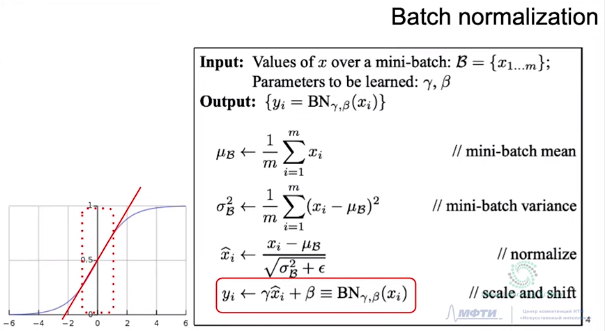

Batch-слой не должен лишать нас информации. Это преобразование должнно иметь возмжность быть тождественным - само в себя, следовательон, они обучаются самой сетью.

## Weights initialisation

- Pitfall: забьем нулями.
- Рандомное распределение

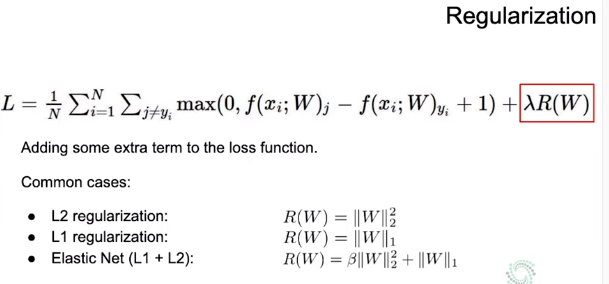

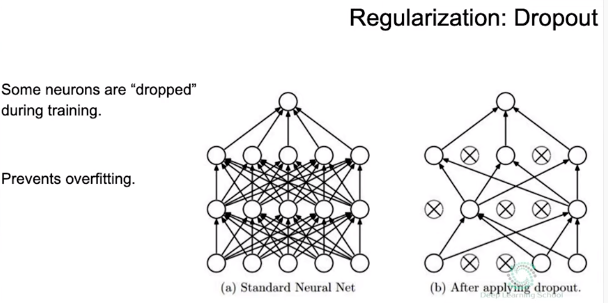

давайт исключать нейроны, умножая на маску единиц и нулей

1. эффективная обобщающая способность сети падает - сложность задачи падает

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

# Домашнее задание. Обучение нейронных сетей на PyTorch.

В этом домашнем задании вам предстоит предсказывать типы небесных объектов. Эту задачу вы будете решать с помощью нейронных сетей, используя библиотеку PyTorch. 

Вам необходимо заполнить пропуски в ноутбуке. Кое-где вас просят сделать выводы о проделанной работе. Постарайтесь ответить на вопросы обдуманно и развёрнуто. 


***В этом домашнем задании мы используем новый метод проверки --- Peer Review.***

Peer Review — альтернативный способ проверки ваших заданий, который подразумевает, что после сдачи задания у вас появится возможность (и даже моральная обязанность, но не строгое обязательство) проверить задания нескольких ваших однокурсников. Соответственно, и ваши работы будут проверять другие учащиеся курса. Для выставления оценки необходимо будет, чтобы вашу работу проверило по крайней мере 3 ваших однокурсника. Вы же, выступая в роли проверяющего, сможете узнать больше о выполненном задании, увидеть, как его выполняли другие. 

Чем больше заданий однокурсников вы проверите, тем лучше! Но, пожалуйста, проверяйте внимательно. По нашим оценкам, на проверку одной работы у вас уйдёт 5-10 минут. Подробные инструкции для проверки заданий мы пришлём позже.

***ВАЖНО!*** Чтобы задание было удобнее проверять, необходимо сдать на Stepik два файла: файл в формате .ipynb и файл в формате .pdf. Файл .pdf можно получить, открыв File->Print и выбрать "Save as PDF". Аналогичный способ есть и в Jupyter.


In [ ]:
import torch
from torch import nn
from torch import functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Дисклеймер про CrossEntropyLoss и NLLLoss

Обычно в PyTorch не нужно делать Softmax как последний слой модели. 

* Если Вы используете NLLLoss, то ему на вход надо давать лог вероятности, то есть выход слоя LogSoftmax. (Просто результат софтмакса, к которому применен логарифм)
* Если Вы используете CrossEntropyLoss, то применение LogSoftmax уже включено внутрь лосса, поэтому ему на вход надо подавать просто выход обычного линейного слоя без активации. По сути CrossEntropyLoss = LogSoftmax + NLLLoss

Зачем такие сложности, чтобы посчитать обычную кросс энтропию, которую мы использовали как лосс еще в логистической регрессии? Дело в том, что нам в любом случае придется взять логарифм от результатов софтмакса, а если делать это одной функцией, то можно сделать более устойчивую реализацию, которая даст меньшую вычислительную погрешность. 

Таким образом, если у вас в конце сети, решающей задачу классификации, стоит просто линейный слой без активации, то вам нужно использовать CrossEntropy. В этой домашке везде используется лосс CrossEntropy

# Задание 1. Создайте генератор батчей. 

В этот раз мы хотим сделать генератор, который будет максимально похож на то, что используется в реальном обучении. 

С помощью numpy вам нужно перемешать исходную выборку и выбирать из нее батчи размером batch_size, если размер выборки не делился на размер батча, то последний батч должен иметь размер меньше batch_size и состоять просто из всех оставшихся объектов. Возвращать нужно в формате (X_batch, y_batch). Необходимо написать именно генератор, то есть вместо return использовать yield. 

Хорошая статья про генераторы: https://habr.com/ru/post/132554/


**Ответ на задание - код**


In [ ]:
def batch_generator(X, y, batch_size):
    np.random.seed(42)
    perm = np.random.permutation(len(X))
    for i in range(0, len(X), batch_size):
        idxs = perm[i: i+batch_size]
        yield X[idxs], y[idxs]
    # YOUR CODE

Попробуем потестировать наш код

In [ ]:
from inspect import isgeneratorfunction
assert isgeneratorfunction(batch_generator), "batch_generator должен быть генератором! В условии есть ссылка на доки"

X = np.array([
              [1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]
])
y = np.array([
              1, 2, 3
])

# Проверим shape первого батча
iterator = batch_generator(X, y, 2)
X_batch, y_batch = next(iterator)
assert X_batch.shape == (2, 3), y_batch.shape == (2,)
assert np.allclose(X_batch, X[:2]), np.allclose(y_batch, y[:2])

# Проверим shape последнего батча (их всего два)
X_batch, y_batch = next(iterator)
assert X_batch.shape == (1, 3), y_batch.shape == (1,)
assert np.allclose(X_batch, X[2:]), np.allclose(y_batch, y[2:])

# Проверим, что итерации закончились
iter_ended = False
try:
    next(iterator)
except StopIteration:
    iter_ended = True
assert iter_ended

# Еще раз проверим то, сколько батчей создает итератор
X = np.random.randint(0, 100, size=(1000, 100))
y = np.random.randint(-1, 1, size=(1000, 1))
num_iter = 0
for _ in batch_generator(X, y, 3):
    num_iter += 1
assert num_iter == (1000 // 3 + 1)

# Задание 2. Обучите модель для классификации звезд

Загрузите датасет из файла sky_data.csv, разделите его на train/test и обучите на нем нейронную сеть (архитектура ниже). Обучайте на батчах с помощью оптимизатора Adam, lr подберите сами, пробуйте что-то вроде 1e-2

Архитектура:

1. Dense Layer с relu активацией и 50 нейронами
2. Dropout 80% (если другой keep rate дает сходимость лучше, то можно изменить) (попробуйте 50%) 
3. BatchNorm
4. Dense Layer с relu активацией и 100 нейронами
5. Dropout 80% (если другой keep rate дает сходимость лучше, то можно изменить) (попробуйте для разнообразия 50%)
6. BatchNorm
7. Выходной Dense слой c количеством нейронов, равному количеству классов

Лосс - CrossEntropy.

В датасете классы представлены строками, поэтому классы нужно закодировать. Для этого в строчке ниже объявлен dict, с помощью него и функции map превратите столбец с таргетом в целое число. Кроме того, за вас мы выделили признаки, которые нужно использовать.

### Загрузка и обработка данных

In [ ]:
feature_columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field']
target_column = 'class'

target_mapping = {
    'GALAXY': 0,
    'STAR': 1,
    'QSO': 2
}

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1K-8CtATw6Sv7k2dXco1fL5MAhTbKtIH3')
data['class'].value_counts()

In [ ]:
data.head()

In [ ]:
# Extract Features
X = data[feature_columns]
# Extract target
y = data[target_column]

In [ ]:
# encode target with target_mapping
y = np.array(y.map(target_mapping))

Нормализация фичей

In [ ]:
# Просто вычтите среднее и поделитe на стандартное отклонение (с помощью пандас). Также преобразуйте всё в np.array
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = np.array((X - X.mean()) / X.std(ddof=0))

In [ ]:
assert type(X) == np.ndarray and type(y) == np.ndarray, 'Проверьте, что получившиеся массивы являются np.ndarray'
assert np.allclose(y[:5], [1,1,0,1,1])
assert X.shape == (10000, 10)
assert np.allclose(X.mean(axis=0), np.zeros(10)) and np.allclose(X.std(axis=0), np.ones(10)), 'Данные не отнормированы'


Обучение

In [ ]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Превратим данные в тензоры, чтобы потом было удобнее
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

Хорошо, данные мы подготовили, теперь надо объявить модель

In [ ]:
torch.manual_seed(42)   
np.random.seed(42)

model = nn.Sequential(
    torch.nn.Linear(10,50),
    torch.nn.BatchNorm1d(50),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(50,100),
    torch.nn.BatchNorm1d(100),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(100,3),
    
)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

### Обучающий цикл

In [ ]:
def train(X_train, y_train, X_test, y_test, num_epoch):
    train_losses = []
    test_losses = []
    for i in range(num_epoch):
        epoch_train_losses = []
        for X_batch, y_batch in batch_generator(X_train, y_train, 500):
            # На лекции мы рассказывали, что дропаут работает по-разному во время обучения и реального предсказания
            # Чтобы это учесть нам нужно включать и выключать режим обучения, делается это командой ниже
            model.train(True)
            # Посчитаем предсказание и лосс
            # YOUR CODE
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # зануляем градиент
            # YOUR CODE
            optimizer.zero_grad()
            # backward
            # YOUR CODE
            loss.backward()
            # ОБНОВЛЯЕМ веса
            # YOUR CODE
            optimizer.step()
            # Запишем число (не тензор) в наши батчевые лоссы
            epoch_train_losses.append(loss.item())        
        train_losses.append(np.mean(epoch_train_losses))
        # Теперь посчитаем лосс на тесте
        model.train(False)
        
        with torch.no_grad():
            # Сюда опять же надо положить именно число равное лоссу на всем тест датасете
            test_losses.append(loss.item())
            
    return train_losses, test_losses

In [ ]:
def check_loss_decreased():
    print("На графике сверху, точно есть сходимость? Точно-точно? [Да/Нет]")
    s = input()
    if s.lower() == 'да':
        print("Хорошо!")
    else:
        raise RuntimeError("Можно уменьшить дропаут, уменьшить lr, поправить архитектуру, etc")

In [ ]:
train_losses, test_losses = train(X_train, y_train, X_test, y_test, 20)
plt.plot(range(len(train_losses)), train_losses, label='train')
plt.plot(range(len(test_losses)), test_losses, label='test')
plt.legend()
plt.show()
    
check_loss_decreased()
assert train_losses[-1] < 0.3 and test_losses[-1] < 0.3

### Вычислите accuracy получившейся модели на train и test

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
train_pred_labels = #YOUR CODE: use forward
test_pred_labels = #YOUR CODE: use forward

train_acc = accuracy_score(# YOUR CODE)
test_acc = accuracy_score(# YOUR CODE)

assert train_acc > 0.9, "Если уж классифицировать звезды, которые уже видел, то не хуже, чем в 90% случаев"
assert test_acc > 0.9, "Новые звезды тоже надо классифицировать хотя бы в 90% случаев"

print("Train accuracy: {}\nTest accuracy: {}".format(train_acc, test_acc))

# Задание 3. Исправление ошибок в архитектуре

Только что вы обучили полносвязную нейронную сеть. Теперь вам предстоит проанализировать архитектуру нейронной сети ниже, исправить в ней ошибки и  обучить её с помощью той же функции train. Пример исправления ошибок есть в семинаре Григория Лелейтнера.

Будьте осторожнее и убедитесь, что перед запуском train вы вновь переопределили все необходимые внешние переменные (train обращается к глобальным переменным, в целом так делать не стоит, но сейчас это было оправдано, так как иначе нам пришлось бы передавать порядка 7-8 аргументов).

Чтобы у вас получилась такая же архитектура, как у нас, и ответы совпали, давайте определим некоторые правила, как исправлять ошибки:

1. Если вы видите лишний нелинейный слой, который стоит не на своем месте, просто удалите его. (не нужно добавлять новые слои, чтобы сделать постановку изначального слоя разумной. Удалять надо самый последний слой, который все портит. Для линейных слоев надо что-то исправить, а не удалить его)
2. Если у слоя нет активации, то добавьте ReLU или другую подходящую активацию
3. Если что-то не так с learning_rate, то поставьте 1e-2
4. Если что-то не так с параметрами, считайте первый параметр, который появляется, как верный (т.е. далее в сети должен использоваться он).
5. Ошибки могут быть и в полносвязных слоях. 
6. Любые другие проблемы решаются более менее однозначно, если же у вас есть серьезные сомнения, то напишите в беседу в телеграме и пинганите меня @runfme


Задача все та же - классификация небесных объектов на том же датасете. После исправления сети вам нужно обучить ее.

**Ответ на задачу - средний лосс на тестовом датасете**

In [ ]:
torch.manual_seed(42)   
np.random.seed(42)
# WRONG ARCH
model = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(6, 50),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(100, 200),
    nn.Softmax(),
    nn.Linear(200, 200),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(200, 3),
    nn.Dropout(p=0.5)
)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters[:-2], lr=1e-100)

In [ ]:
# RIGHT ARCH
torch.manual_seed(42)   
np.random.seed(42)
model = nn.Sequential(
    <YOUR CODE>
)


loss_fn = <YOUR CODE>
optimizer = <YOUR CODE>

### Обучите и протестируйте модель так же, как вы это сделали в задаче 2. Вычислите accuracy.

In [ ]:
#YOUR CODE

train_acc = <YOUR CODE>
test_acc = <YOUR CODE>


assert train_acc > 0.9, "Если уж классифицировать звезды, которые уже видел, то не хуже, чем в 90% случаев"
assert test_acc > 0.9, "Новые звезды тоже надо классифицировать хотя бы в 90% случаев"


# Задание 4. Stack layers

Давайте посмотрим, когда добавление перестает улучшать метрики. Увеличивайте блоков из слоев в сети, пока минимальный лосс на тестовом датасете за все время обучения не перестанет уменьшаться (20 эпох). 

Стоит помнить, что нельзя переиспользовать слои с предыдущих обучений, потому что они уже будут с подобранными весами.

**Чтобы получить воспроизводимость и идентичный нашему ответ, надо объявлять все слои в порядке, в котором они применяются внутри модели. Это важно, если вы будете собирать свою модель из частей. Перед объявлением этих слоев по порядку напишите**
> torch.manual_seed(42)   
> np.random.seed(42)

**При чем каждый раз, когда вы заново создаете модель, перезадавайте random seeds**

**Опитимизатор - Adam(lr=1e-2)**


In [ ]:
# МОДЕЛЬ ДЛЯ ПРИМЕРА, НА САМОМ ДЕЛЕ ВАМ ПРИДЕТСЯ СОЗДАВАТЬ НОВУЮ МОДЕЛЬ ДЛЯ КАЖДОГО КОЛИЧЕСТВА БЛОКОВ
model = nn.Sequential(
    nn.Linear(len(feature_columns), 100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # Начало блока, который надо вставалять много раз
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.BatchNorm1d(100),
    # Конец блока
    nn.Linear(100, 3)
    # Блока Softmax нет, поэтому нам нужно использовать лосс - CrossEntropyLoss
)

In [ ]:
# Вы уже многое умеете, поэтому теперь код надо написать самому
# Идея - разделить модель на части.
# Вначале создать head часть как Sequential модель, потом в цикле создать Sequential модели, которые представляют
# из себя блоки, потом создать tail часть тоже как Sequential, а потом объединить их в одну Sequential модель 
# вот таким кодом: nn.Sequential(header, *blocks, footer)
# Важная идея тут состоит в том, что модели могут быть частями других моделей)
<YOUR CODE>

## Задание 5. Сделайте выводы 
Начиная с какого количества блоков минимальный лосс за время обучения увеличивается? Почему лишнее количество блоков не помогает модели? 